In [ ]:
!jupyter nbconvert "/content/drive/MyDrive/Colab Notebooks/Introduction to Computer Vision/Transfer Learning/Plants Seedling Classification Project.ipynb" --output "Plants Seedling Classification"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Introduction to Computer Vision/Transfer Learning/Plants Seedling Classification Project.ipynb to html
[NbConvertApp] Writing 2317753 bytes to /content/drive/MyDrive/Colab Notebooks/Introduction to Computer Vision/Transfer Learning/Plants Seedling Classification.html


# **Plants Seedling Classification- Problem Statement**
## **Background and Context**
In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term.

The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can benefit the workers in this field, as the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning. The ability to do so far more efficiently and even more effectively than experienced manual labor could lead to better crop yields, the freeing up of human involvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.

## **Objective**
The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has provided the data containing images of unique plants belonging to 12 different species. You being a data scientist, need to build a Convolutional Neural Network model which would classify the plant seedlings into their respective 12 categories.
## **Data Description**
This dataset contains images of unique plants belonging to 12 different species
* The data file names are:
  * images.npy
  * Label.csv

* Due to the large volume of data, the images were converted to numpy arrays and stored in images.npy file and the corresponding labels are also put into Labels.csv so that you can work on the data/project seamlessly without having to worry about the high data volume.
* The goal of the project is to create a classifier capable of determining a plant's species from an image.

## **List of Plant species**
* Black-grass
* Charlock
* Cleavers
* Common Chickweed
* Common Wheat
* Fat Hen
* Loose Silky-bent
* Maize
* Scentless Mayweed
* Shepherds Purse
* Small-flowered Cranesbill
* Sugar beet



In [ ]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importing matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix

# Display images using OpenCV
from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images
from PIL import Image

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# (Greatlearning login)


**Reading the dataset**


In [ ]:
# Mount Google drive to access the dataset (plants_seedling_classification.zip)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the image file of the dataset
images = np.load('/content/drive/MyDrive/Colab Notebooks/Introduction to Computer Vision/Transfer Learning/images.npy')

# Load the labels file of the dataset
labels = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Introduction to Computer Vision/Transfer Learning/Labels.csv')

# (Greatlearning login)

**Overview of the dataset**

Let's print the shape of the images and labels

In [ ]:
print(images.shape)
print(labels.shape)

# (Greatlearning login)

(4750, 128, 128, 3)
(4750, 1)


There are 4750 RGB images of shape 128 x 128 X 3, each image having 3 channels.

**Plotting images using OpenCV and matplotlib**


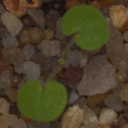

In [ ]:
cv2_imshow(images[5])

# (Greatlearning login)

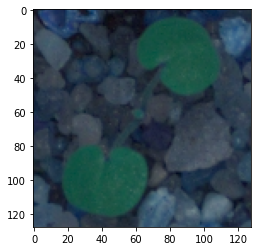

In [ ]:
plt.imshow(images[5])

# (Greatlearning login)

* We can observe that the images are being shown in different colors when plotted with openCV and matplotlib as OpenCV reads images in BGR format and this shows that the given numpy arrays were generated from the original images using OpenCV.
* Now we will convert these BGR images to RGB images so we could interpret them easily.

(Greatlearning login)

In [ ]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

  # (Greatlearning login)

## **Exploratory Data Analysis**

In [ ]:
def plot_images(images, labels):
  num_classess=12
  categories=np.unique(labels)
  keys=dict(labels['Label'])
  rows = 3
  cols = 4
  fig = plt.figure(figsize=(10, 8))
  for i in range(cols):
    for j in range(rows):
      random_index = np.random.randint(0, len(labels))
      ax = fig.add_subplot(rows, cols, i * rows + j + 1)
      ax.imshow(images[random_index, :])
      ax.set_title(keys[random_index])
  plt.show()

  # (Greatlearning login)

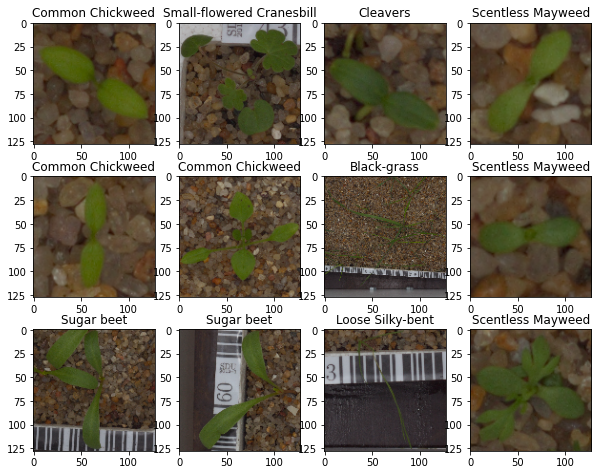

In [ ]:
plot_images(images, labels)

  # (Greatlearning login)

**Resizing images**
As the size of the images are large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [ ]:
images_decreased=[]
height = 64
width = 64
dimensions = (width, height)
for i in range(len(images)):
  images_decreased.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

# (Greatlearning login)

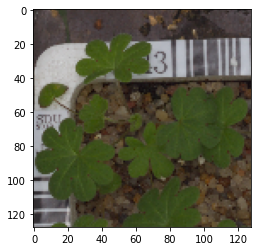

In [ ]:
plt.imshow(images[3])

# (Greatlearning login)

## **Visualizing images using Gaussian Blur**

In [ ]:
# Applying Gaussian Blur
images_gb = []
for i in range(len(images)):
   #gb[i] = cv2.cvtColor(images[i], cv2.COLOR_BGE2RGB)
  images_gb.append(cv2.GaussianBlur(images[i], ksize=(3, 3), sigmaX = 0))

# (Greatlearning login)

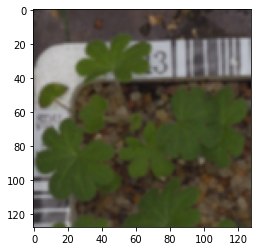

In [ ]:
plt.imshow(images_gb[3])

# (Greatlearning login)

* It appears that GaussianBlur would be ineffective because the blurred or denoised image does not seem to contain any relevant information, and the model would struggle to categorize these blurred images.
## **Splitting the dataset**

* As we have less images in our dataset, we will only use 10% of our data for testing, 10% of our data for validation and 80% of our data for training.
* We are using the train_test_split() function from scikit-learn. Here, we split the dataset into three parts, train,test and validation.

(Greatlearning login)

In [ ]:
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images), labels, test_size=0.1, random_state=42, stratify=labels)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1, random_state=42, stratify=y_temp)

# (Greatlearning login)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

# (Greatlearning login)

(3847, 128, 128, 3) (3847, 1)
(428, 128, 128, 3) (428, 1)
(475, 128, 128, 3) (475, 1)


**Checking for data unbalance**

In [ ]:
# Storing the value counts of target variable
count = y_train.Label.value_counts()
print(count)
print('*'*10)
count=y_train.Label.value_counts(normalize=True)
print(count)

# (Greatlearning login)

Loose Silky-bent             530
Common Chickweed             495
Scentless Mayweed            418
Small-flowered Cranesbill    402
Fat Hen                      384
Charlock                     316
Sugar beet                   312
Cleavers                     232
Black-grass                  213
Shepherds Purse              187
Maize                        179
Common wheat                 179
Name: Label, dtype: int64
**********
Loose Silky-bent             0.137770
Common Chickweed             0.128672
Scentless Mayweed            0.108656
Small-flowered Cranesbill    0.104497
Fat Hen                      0.099818
Charlock                     0.082142
Sugar beet                   0.081102
Cleavers                     0.060307
Black-grass                  0.055368
Shepherds Purse              0.048609
Maize                        0.046530
Common wheat                 0.046530
Name: Label, dtype: float64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

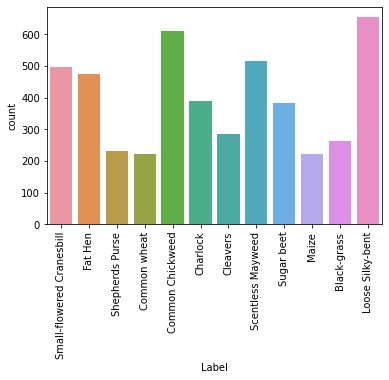

In [ ]:
sns.countplot(labels['Label'])
plt.xticks(rotation='vertical')

# (Greatlearning login)

* As you can see from the above plot, the dataset is unbalanced.
* Loose Silky-bent has the most count at 530 (14% of the data)followed by Common Chickweed at 495 (13% of the data).
* Shepherds Purse, Common wheat, and Maize have the least count respectively, with Common wheat and Maize having the same count at 179 (5% of the data).

## **Making the data compatible:**
* Convert labels from names to one hot vectors
* Normalizing the values
## **Encoding the target labels**

(Greatlearning login)

In [ ]:
# Convert labels from names to one hot vectors.
# We will be using an encoding method called LabelBinarizer
# LabelBinarizer works similar to onehotencoder

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded = enc.transform(y_val)
y_test_encoded = enc.transform(y_test)

# (Greatlearning login)

## **Data Normalization**
Since the image pixel values range from 0-255, our method of normalization here will be scaling - we shall divide all the pixel values by 255 to standardize the images to have values between 0-1.

(Greatlearning login)

In [ ]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

# (Greatlearning login)

# **Model Building - Convolutional Neural Network (CNN)**

Let's create a CNN model sequentially, where we will be adding the layers one after another.

Let's set the seed for random number generators in Numpy, the Random library in Python, and in TensorFlow to be able to reproduce the same results every time we run the code.

When we run a new model we will need to clear the previous model's history from the session even if a single model can run multiple times on the same data.

In Keras, we need a special command to clear the model's history, otherwise the previous model history remains in the backend.

Also, we will fix the seed again after clearing the backend.

(Greatlearning login)

In [ ]:
# clearing backend
from tensorflow.keras import backend
backend.clear_session()

# (Greatlearning login)

In [ ]:
# fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# (Greatlearning login)

Now, let's build a CNN Model with the following 2 main parts -

1. The Feature Extraction layers which are comprised of convolutional and pooling layers.
2. The Fully Connected classification layers for prediction.

(Greatlearning login)

In [ ]:
# Intializing a sequential model
cnn_model = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension images
cnn_model.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(128, 128, 3)))
cnn_model.add(BatchNormalization(axis=3)) # (Plant Seedlings with CNN and Image Processing)
cnn_model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))

# Adding max pooling to reduce the size of output of first conv layer
cnn_model.add(MaxPooling2D((2, 2), padding = 'same'))
cnn_model.add(BatchNormalization(axis=3)) # (Plant Seedlings with CNN and Image Processing)
cnn_model.add(Dropout(0.1)) # (Plant Seedlings with CNN and Image Processing)

cnn_model.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
cnn_model.add(BatchNormalization(axis=3)) # (Plant Seedlings with CNN and Image Processing)
cnn_model.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
cnn_model.add(MaxPooling2D((2, 2), padding = 'same'))
cnn_model.add(BatchNormalization(axis=3)) # (Plant Seedlings with CNN and Image Processing)
cnn_model.add(Dropout(0.1)) # (Plant Seedlings with CNN and Image Processing)

cnn_model.add(Conv2D(256, (3, 3), activation='relu', padding="same"))
cnn_model.add(BatchNormalization(axis=3)) # (Plant Seedlings with CNN and Image Processing)
cnn_model.add(Conv2D(256, (3, 3), activation='relu', padding="same"))
cnn_model.add(MaxPooling2D((2, 2), padding = 'same'))
cnn_model.add(BatchNormalization(axis=3)) # (Plant Seedlings with CNN and Image Processing)
cnn_model.add(Dropout(0.1)) # (Plant Seedlings with CNN and Image Processing)

cnn_model.add(Flatten())

# Adding a fully connected dense layer with 100 neurons
cnn_model.add(Dense(256, activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Dropout(0.5))

cnn_model.add(Dense(256, activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Dropout(0.5))

# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
cnn_model.add(Dense(12, activation='softmax'))

# Using SGD Optimizer
# opt = SGD(learning_rate=0.01, momentum=0.9)
opt=Adam()
# Compile model
cnn_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
cnn_model.summary()

# (Greatlearning login)
# (Plant Seedlings with CNN and Image Processing)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 64)     256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      18464     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 64, 64, 32)       128       
 hNormalization)                                                 
                                                        

Let's now compile and train the model using the train data. Here, we are using the loss function - categorical_crossentropy as this is a multi-class classification problem. We will try to minimize this loss at every iteration using the optimizer of our choice. Also, we are choosing accuracy as the metric to measure the performance of the model.



**Fitting the model on the train data**


In [ ]:
history_1 = cnn_model.fit(
            X_train_normalized, y_train_encoded,
            epochs=30,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=32,
            validation_split=0.10, verbose=1)

# (Greatlearning login)

Epoch 1/30
121/121 [==============================] - 26s 121ms/step - loss: 2.1593 - accuracy: 0.3816 - val_loss: 13.0528 - val_accuracy: 0.1379
Epoch 2/30
121/121 [==============================] - 11s 92ms/step - loss: 1.2499 - accuracy: 0.5968 - val_loss: 19.8906 - val_accuracy: 0.1379
Epoch 3/30
121/121 [==============================] - 11s 92ms/step - loss: 0.8950 - accuracy: 0.7034 - val_loss: 11.5060 - val_accuracy: 0.1379
Epoch 4/30
121/121 [==============================] - 11s 93ms/step - loss: 0.7434 - accuracy: 0.7544 - val_loss: 3.9736 - val_accuracy: 0.3271
Epoch 5/30
121/121 [==============================] - 11s 93ms/step - loss: 0.6375 - accuracy: 0.7832 - val_loss: 2.1916 - val_accuracy: 0.4439
Epoch 6/30
121/121 [==============================] - 11s 94ms/step - loss: 0.5057 - accuracy: 0.8274 - val_loss: 1.4291 - val_accuracy: 0.6238
Epoch 7/30
121/121 [==============================] - 11s 95ms/step - loss: 0.4904 - accuracy: 0.8303 - val_loss: 0.7747 - val_accur

### **Model Evaluation**

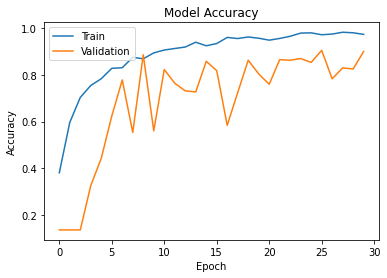

In [ ]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# (Greatlearning login)

**Observations:**


*   We can see from the above plot that **the training accuracy of the  model is excellent at 97% and the validation accuracy is very good as well at 90%.**


### **Evaluating the model on test data**

In [ ]:
accuracy = cnn_model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

# (Greatlearning login)

15/15 - 2s - loss: 0.6249 - accuracy: 0.8695 - 2s/epoch - 112ms/step


**Observations:**

* Test accuracy is 87% which is generalizing with the validation dataset.

### **Generating the predictions using test data**

In [ ]:
# Here we would get the output as probablities for each category
y_pred=cnn_model.predict(X_test_normalized)

# (Greatlearning login)

15/15 [==============================] - 0s 21ms/step


In [ ]:
y_pred

# (Greatlearning login)

array([[4.2727152e-08, 6.5576501e-08, 2.7192513e-08, ..., 3.0050239e-06,
        3.2343041e-06, 2.0001248e-06],
       [6.5897926e-11, 1.2208869e-05, 2.8018174e-08, ..., 2.7852575e-06,
        9.9996650e-01, 4.0315207e-10],
       [5.1326381e-11, 9.2796686e-09, 1.3561898e-08, ..., 1.5200003e-07,
        9.9999952e-01, 2.3425272e-11],
       ...,
       [4.1679552e-01, 3.6550131e-07, 2.6821354e-07, ..., 2.6646164e-06,
        2.3831590e-06, 1.6858594e-06],
       [1.1617644e-07, 5.9505629e-07, 2.2973694e-05, ..., 3.3993255e-03,
        2.8665698e-07, 3.0352514e-06],
       [2.0353448e-06, 2.4069937e-04, 3.3859570e-02, ..., 9.6254182e-01,
        2.9378298e-03, 1.4069121e-05]], dtype=float32)

### **Plotting the Confusion Matrix**

*   The Confusion matrix is also defined as an inbuilt function in the TensorFlow module, so we can use that for evaluating the classification model.
*   The Confusion matrix expects categorical data as input. However, y_test_encoded is an encoded value, whereas y_pred has probabilities. So,we must retrieve the categorical values from the encoded values.
*   We will use the `argmax()` function to obtain the maximum value over each category on both y_test_encoded and y_pred and obtain their respective classes.

(Greatlearning login)





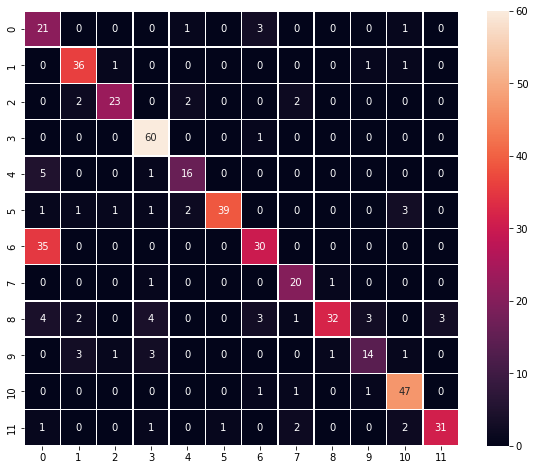

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg_cnn=np.argmax(y_pred,axis=1)
y_test_arg_cnn=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg_cnn,y_pred_arg_cnn)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

# (Greatlearning login)

<b> Observations</b><br>
- We observe that a lot of the classes predicting correctly.
- In comparison to the rest, we can see that classes 3, 5, 6, 8, 10, and 11 are well classified.
- We can also observe that classes 0 is misclassified with 6, likewise 6 is misclassified with 0.
* We can also observe that classes 2, 4, 7, and 9 need some improve with classifying correctly.

**Classification Report for each class**

* Precision: precision is the fraction of relevant instances among the retrieved instances.

* Recall: recall is the fraction of relevant instances that were retrieved.

* F-beta score: The F-beta score is the weighted harmonic mean of precision and recall, reaching its optimal value at 1 and its worst value at 0. The beta parameter determines the weight of recall in the combined score.




In [ ]:
from sklearn.metrics import classification_report
print(classification_report((y_test_arg_cnn), y_pred_arg_cnn))

# (Greatlearning login)

              precision    recall  f1-score   support

           0       0.31      0.81      0.45        26
           1       0.82      0.92      0.87        39
           2       0.88      0.79      0.84        29
           3       0.85      0.98      0.91        61
           4       0.76      0.73      0.74        22
           5       0.97      0.81      0.89        48
           6       0.79      0.46      0.58        65
           7       0.77      0.91      0.83        22
           8       0.94      0.62      0.74        52
           9       0.74      0.61      0.67        23
          10       0.85      0.94      0.90        50
          11       0.91      0.82      0.86        38

    accuracy                           0.78       475
   macro avg       0.80      0.78      0.77       475
weighted avg       0.83      0.78      0.78       475



## **Observations**

* Best precision score is class 5, worse precision score is class 0.
* Best recall score is class 3, worse precision score is class 6.
* Best f1-score is class 3, worse f1-score is class 0.

# **Model-2**

As we can see, our initial model is generalizing well. There are some classes that are not predicting well. We will try to address this problem with data augmentation to check if we can improve the model's performance.


(Greatlearning login)

## **Data Augmentation**

In most of the real-world case studies, it is challenging to acquire a large number of images and then train CNNs. To overcome this problem, one approach we might consider is **Data Augmentation**. CNNs have the property of **translational invariance**, which means they can recognise an object even if its appearance shifts translationally in some way. <br> Taking this attribute into account, we can augment the images using the techniques listed below - <br>
**1. Horizontal Flip** (should be set to True/False) <br>
**2. Vertical Flip** (should be set to True/False) <br>
**3. Height Shift** (should be between 0 and 1) <br>
**4. Width Shift** (should be between 0 and 1) <br>
**5. Rotation** (should be between 0 and 180) <br>
**6. Shear** (should be between 0 and 1) <br>
**7. Zoom** (should be between 0 and 1) etc. <br>

Remember, **data augmentation should not be used in the validation/test data set**.

(Greatlearning login)

**Data generator**
To avoid overfitting we need to create image generator which will randomly rotate, zoom, shift and flip image during the fitting of the model.

* Set random rotation from 0 to 180 degrees
* Set random zoom at 0.1
* Set random shifting at 0.1
* Set horizontal and vertical flips

(Plant Seedlings with CNN and Image Processing)



In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# (Greatlearning login)

In [ ]:
# All images to be rescaled by 1/255.
train_datagen = ImageDataGenerator(
        rotation_range=180,  # randomly rotate images in the range
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally
        height_shift_range=0.1,  # randomly shift images vertically
        horizontal_flip=True,  # randomly flip images horizontally
        vertical_flip=True  # randomly flip images vertically
    )

train_datagen.fit(X_train_normalized)


# (Plant Seedlings with CNN and Image Processing)
# (Greatlearning login)

In [ ]:
# Intializing a sequential model
model_2 = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension images
model_2.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(128, 128, 3)))
model_2.add(BatchNormalization(axis=3)) # (Plant Seedlings with CNN and Image Processing)
model_2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))

# Adding max pooling to reduce the size of output of first conv layer
model_2.add(MaxPooling2D((2, 2), padding = 'same'))
model_2.add(BatchNormalization(axis=3)) # (Plant Seedlings with CNN and Image Processing)
model_2.add(Dropout(0.1)) # (Plant Seedlings with CNN and Image Processing)

model_2.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
model_2.add(BatchNormalization(axis=3)) # (Plant Seedlings with CNN and Image Processing)
model_2.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
model_2.add(MaxPooling2D((2, 2), padding = 'same'))
model_2.add(BatchNormalization(axis=3)) # (Plant Seedlings with CNN and Image Processing)
model_2.add(Dropout(0.1)) # (Plant Seedlings with CNN and Image Processing)

model_2.add(Conv2D(256, (3, 3), activation='relu', padding="same"))
model_2.add(BatchNormalization(axis=3)) # (Plant Seedlings with CNN and Image Processing)
model_2.add(Conv2D(256, (3, 3), activation='relu', padding="same"))
model_2.add(MaxPooling2D((2, 2), padding = 'same'))
model_2.add(BatchNormalization(axis=3)) # (Plant Seedlings with CNN and Image Processing)
model_2.add(Dropout(0.1)) # (Plant Seedlings with CNN and Image Processing)

model_2.add(Flatten())

# Adding a fully connected dense layer with 100 neurons
model_2.add(Dense(256, activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.5))

model_2.add(Dense(256, activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.5))

# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model_2.add(Dense(12, activation='softmax'))

# Using SGD Optimizer
# opt = SGD(learning_rate=0.01, momentum=0.9)
opt=Adam()
# Compile model
model_2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model_2.summary()

# (Greatlearning login)
# (Plant Seedlings with CNN and Image Processing)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 64)     256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      18464     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 64, 64, 32)       128       
 hNormalization)                                                 
                                                        

In [ ]:
# Epochs
epochs = 30
# Batch size
batch_size = 64

history = model_2.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size,
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    verbose=1)

# (Greatlearning login)

Epoch 1/30
60/60 [==============================] - 20s 237ms/step - loss: 2.2817 - accuracy: 0.3606 - val_loss: 14.6879 - val_accuracy: 0.1379
Epoch 2/30
60/60 [==============================] - 14s 229ms/step - loss: 1.4013 - accuracy: 0.5591 - val_loss: 22.1680 - val_accuracy: 0.1379
Epoch 3/30
60/60 [==============================] - 14s 229ms/step - loss: 1.1272 - accuracy: 0.6265 - val_loss: 18.0801 - val_accuracy: 0.1379
Epoch 4/30
60/60 [==============================] - 14s 230ms/step - loss: 1.0356 - accuracy: 0.6558 - val_loss: 20.7067 - val_accuracy: 0.1379
Epoch 5/30
60/60 [==============================] - 14s 228ms/step - loss: 0.9341 - accuracy: 0.6833 - val_loss: 34.0063 - val_accuracy: 0.1379
Epoch 6/30
60/60 [==============================] - 14s 229ms/step - loss: 0.7619 - accuracy: 0.7285 - val_loss: 21.3224 - val_accuracy: 0.1379
Epoch 7/30
60/60 [==============================] - 14s 227ms/step - loss: 0.6948 - accuracy: 0.7639 - val_loss: 10.8115 - val_accuracy:

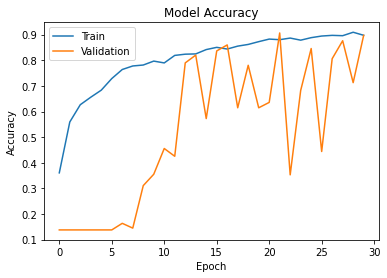

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# (Greatlearning login)

In [ ]:
accuracy = model_2.evaluate(X_test_normalized, y_test_encoded, verbose=2)

# (Greatlearning login)

15/15 - 0s - loss: 0.4475 - accuracy: 0.8547 - 422ms/epoch - 28ms/step


* We can observe that our accuracy has decreased slightly compared to our previous model. However, this model seems to be generalizing like the cnn_model.

In [ ]:
# Here we would get the output as probablities for each category
y_pred=model_2.predict(X_test_normalized)

# (Greatlearning login)

15/15 [==============================] - 0s 21ms/step


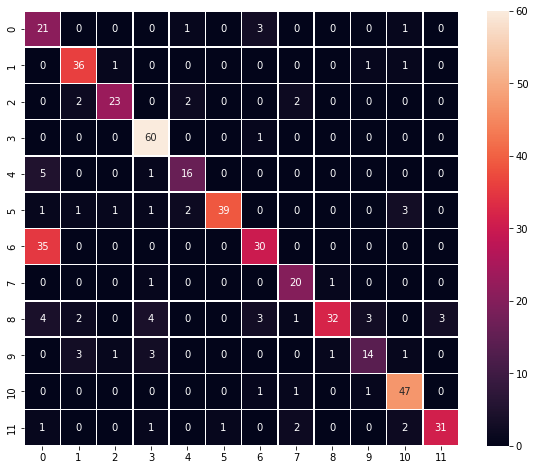

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg_m2 = np.argmax(y_pred,axis=1)
y_test_arg_m2 = np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg_m2,y_pred_arg_m2)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

# (Greatlearning login)

<b> Observations</b><br>
- As with cnn_model, we observe similar classifications of the classes.
- Misclassification has increased where classes 0 is misclassified with 6, likewise 6 is misclassified with 0.

Let's try Transfer Learning using VGG16 to improve our models.

**Classification Report for each class**




In [ ]:
from sklearn.metrics import classification_report
print(classification_report((y_test_arg_m2), y_pred_arg_m2))

# (Greatlearning login)

              precision    recall  f1-score   support

           0       0.31      0.81      0.45        26
           1       0.82      0.92      0.87        39
           2       0.88      0.79      0.84        29
           3       0.85      0.98      0.91        61
           4       0.76      0.73      0.74        22
           5       0.97      0.81      0.89        48
           6       0.79      0.46      0.58        65
           7       0.77      0.91      0.83        22
           8       0.94      0.62      0.74        52
           9       0.74      0.61      0.67        23
          10       0.85      0.94      0.90        50
          11       0.91      0.82      0.86        38

    accuracy                           0.78       475
   macro avg       0.80      0.78      0.77       475
weighted avg       0.83      0.78      0.78       475



## **Observations**

* Best precision score is class 5, worse precision score is class 0.
* Best recall score is class 3, worse precision score is class 6.
* Best f1-score is class 3, worse f1-score is class 0.

# **Transfer Learning using VGG16**

- Let's try again, but this time, we will be using the idea of **Transfer Learning**. We will be loading a pre-built architecture - **VGG16**, which was trained on the ImageNet dataset and is the runner-up in the ImageNet competition in 2014.

- For training VGG16, we will directly use the convolutional and pooling layers and freeze their weights i.e. no training will be done on them. For classification, we will replace the existing fully-connected layers with FC layers created specifically for our problem.

(Greatlearning login)


In [ ]:
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16

vgg_model = VGG16(weights='imagenet', include_top = False, input_shape = (128, 128,3))
vgg_model.summary()

# (Greatlearning login)

58889256/58889256 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                              

In [ ]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False

# (Greatlearning login)

In [ ]:
new_model = Sequential()

# Adding the convolutional part of the VGG16 model from above
new_model.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
new_model.add(Flatten())

# Adding a fully connected dense layer with 256 neurons
new_model.add(Dense(256, activation='relu'))
new_model.add(BatchNormalization())
new_model.add(Dropout(0.5))

new_model.add(Dense(256, activation='relu'))
new_model.add(BatchNormalization())
new_model.add(Dropout(0.5))

# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
new_model.add(Dense(12, activation='softmax'))

# Using SGD Optimizer
#opt = SGD(learning_rate=0.01, momentum=0.9)
opt=Adam()
# Compile model
new_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
new_model.summary()

# (Greatlearning login)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_3 (Dense)             (None, 256)               2097408   
                                                                 
 batch_normalization_8 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                      

In [ ]:
# Epochs
epochs = 40
# Batch size
batch_size = 64

history_vgg16 = new_model.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size,
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    verbose=1)

# (Greatlearning login)

Epoch 1/40
60/60 [==============================] - 18s 270ms/step - loss: 2.6398 - accuracy: 0.2532 - val_loss: 2.7248 - val_accuracy: 0.1519
Epoch 2/40
60/60 [==============================] - 14s 233ms/step - loss: 2.0614 - accuracy: 0.3598 - val_loss: 2.0780 - val_accuracy: 0.3224
Epoch 3/40
60/60 [==============================] - 14s 237ms/step - loss: 1.7441 - accuracy: 0.4385 - val_loss: 1.5903 - val_accuracy: 0.4533
Epoch 4/40
60/60 [==============================] - 14s 234ms/step - loss: 1.5831 - accuracy: 0.4798 - val_loss: 1.3436 - val_accuracy: 0.5607
Epoch 5/40
60/60 [==============================] - 14s 237ms/step - loss: 1.5015 - accuracy: 0.5057 - val_loss: 1.1830 - val_accuracy: 0.6051
Epoch 6/40
60/60 [==============================] - 14s 233ms/step - loss: 1.3820 - accuracy: 0.5313 - val_loss: 1.3512 - val_accuracy: 0.5584
Epoch 7/40
60/60 [==============================] - 15s 248ms/step - loss: 1.3065 - accuracy: 0.5477 - val_loss: 1.1327 - val_accuracy: 0.6238

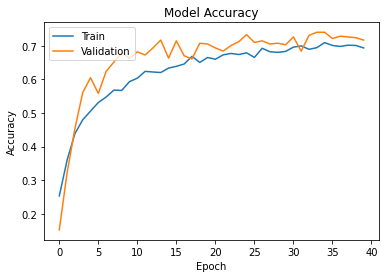

In [ ]:
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# (Greatlearning login)

### **The VGG16 model is underfitting the data, which can cause the model to become worse in generalizing. This is not something we want.**

In [ ]:
accuracy = new_model.evaluate(X_test_normalized, y_test_encoded, verbose=2)
# (Greatlearning login)

15/15 - 2s - loss: 0.8187 - accuracy: 0.7305 - 2s/epoch - 139ms/step


In [ ]:
# Here we would get the output as probablities for each category
y_pred=new_model.predict(X_test_normalized)

# (Greatlearning login)

15/15 [==============================] - 1s 51ms/step


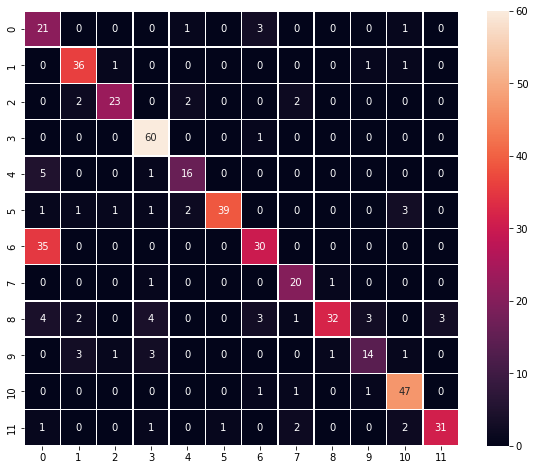

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg_vgg = np.argmax(y_pred,axis=1)
y_test_arg_vgg = np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg_vgg,y_pred_arg_vgg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

# (Greatlearning login)

* According to the confusion matrix and accuracy curve, the VGG16 model has not outperformed either cnn_model nor Model - 2. The model is underfitting, so generalizing will get worse.
* Thus we can say that VGG16 is not our best model.



**Classification Report for each class**




In [ ]:
from sklearn.metrics import classification_report
print(classification_report((y_test_arg_vgg), y_pred_arg_vgg))

# (Greatlearning login)

              precision    recall  f1-score   support

           0       0.31      0.81      0.45        26
           1       0.82      0.92      0.87        39
           2       0.88      0.79      0.84        29
           3       0.85      0.98      0.91        61
           4       0.76      0.73      0.74        22
           5       0.97      0.81      0.89        48
           6       0.79      0.46      0.58        65
           7       0.77      0.91      0.83        22
           8       0.94      0.62      0.74        52
           9       0.74      0.61      0.67        23
          10       0.85      0.94      0.90        50
          11       0.91      0.82      0.86        38

    accuracy                           0.78       475
   macro avg       0.80      0.78      0.77       475
weighted avg       0.83      0.78      0.78       475



## **Observations**

* Best precision score is class 5, worse precision score is class 0.
* Best recall score is class 3, worse precision score is class 6.
* Best f1-score is class 3, worse f1-score is class 0.

## **Before we conclude which model is our best. Let's try changing our images from RGB to HSV.**

bold text## **HSV Green Plant**
We need to convert RGB image to HSV. HSV is alternative of the RGB color model. In HSV, it is easier to represent a color range than in RGB color space.

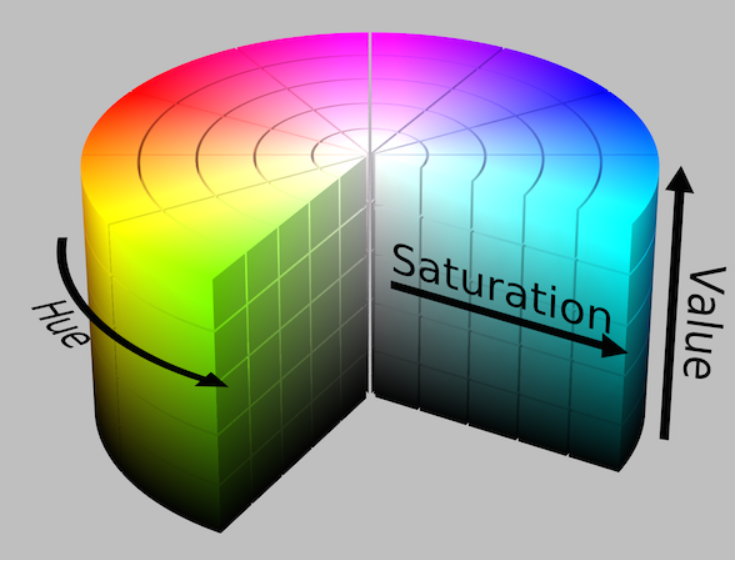

Besides of this, we'll blur image firstly for removing noise. After creating HSV image, we'll create mask based on empirically selected range of green color, convert it to boolean mask and apply it to the origin image.

* Use gaussian blur for remove noise
* Convert color to HSV
* Create mask
* Create boolean mask
* Apply boolean mask and getting image whithout background


(Plant Seedlings with CNN and Image Processing)

In [ ]:
import cv2
from glob import glob
import numpy as np
from matplotlib import pyplot as plt
import math
import pandas as pd

ScaleTo = 70  # px to scale
seed = 7  # fixing random


path = '/content/drive/MyDrive/Colab Notebooks/Introduction to Computer Vision/Transfer Learning/images.npy'

trainImg = []
trainLabel = []


images_decreased=[]
height = 64
width = 64
dimensions = (width, height)
for i in range(len(images)):
  images_decreased.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

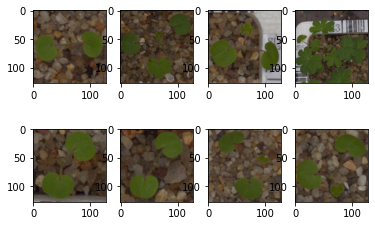

In [ ]:
# Show some example images
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(images[i])

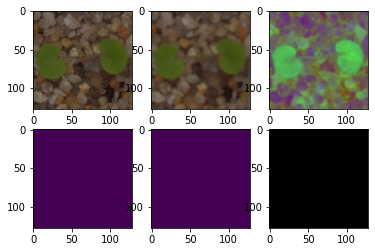

In [ ]:
clearTrainImg = []
examples = []; getEx = True
for img in images:
    # Use gaussian blur
    blurImg = cv2.GaussianBlur(img, (5, 5), 0)

    # Convert to HSV image
    hsvImg = cv2.cvtColor(blurImg, cv2.COLOR_BGR2HSV)

    # Create mask (parameters - green color range)
    lower_green = (25, 40, 50)
    upper_green = (75, 255, 255)
    mask = cv2.inRange(hsvImg, lower_green, upper_green)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

    # Create bool mask
    bMask = mask > 0

    # Apply the mask
    clear = np.zeros_like(img, np.uint8)  # Create empty image
    clear[bMask] = img[bMask]  # Apply boolean mask to the origin image

    clearTrainImg.append(hsvImg)  # Append image by changing the leaves to a different shade of green

       # Show examples
    if getEx:
        plt.subplot(2, 3, 1); plt.imshow(img)  # Show the original image
        plt.subplot(2, 3, 2); plt.imshow(blurImg)  # Blur image
        plt.subplot(2, 3, 3); plt.imshow(hsvImg)  # HSV image
        plt.subplot(2, 3, 4); plt.imshow(mask)  # Mask
        plt.subplot(2, 3, 5); plt.imshow(bMask)  # Boolean mask
        plt.subplot(2, 3, 6); plt.imshow(clear)  # Image without background
        getEx = False

clearTrainImg = np.asarray(clearTrainImg)

# (Plant Seedlings with CNN and Image Processing)

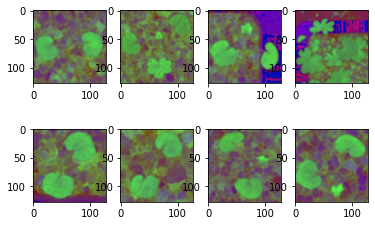

In [ ]:
# Show sample result
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(clearTrainImg[i])

# (Plant Seedlings with CNN and Image Processing)

**Normalize input**

Now set the values of input from [0...255] to [0...1] (RGB color-space encode colors with numbers [0...255]). CNN will be faster train if we use [0...1] input

(Plant Seedlings with CNN and Image Processing)

In [ ]:
clearTrainImg = clearTrainImg / 255

# (Plant Seedlings with CNN and Image Processing)

# **HSV Model**

## **Data generator**
To avoid overfitting we need to create image generator which will randomly rotate, zoom, shift and flip image during the fitting of the model.

* Set random rotation from 0 to 180 degrees
* Set random zoom at 0.1
* Set random shifting at 0.1
* Set horisontal and vertical flips

(Plant Seedlings with CNN and Image Processing)

In [ ]:
# clearing backend
from tensorflow.keras import backend
backend.clear_session()

# (Greatlearning login)

In [ ]:
# fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# (Greatlearning login)

In [ ]:
# Intializing a sequential model
hsv_model = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension images
hsv_model.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(128, 128, 3)))
hsv_model.add(BatchNormalization(axis=3)) # (Plant Seedlings with CNN and Image Processing)
hsv_model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))

# Adding max pooling to reduce the size of output of first conv layer
hsv_model.add(MaxPooling2D((2, 2), padding = 'same'))
hsv_model.add(BatchNormalization(axis=3)) # (Plant Seedlings with CNN and Image Processing)
hsv_model.add(Dropout(0.1)) # (Plant Seedlings with CNN and Image Processing)

hsv_model.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
hsv_model.add(BatchNormalization(axis=3)) # (Plant Seedlings with CNN and Image Processing)
hsv_model.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
hsv_model.add(MaxPooling2D((2, 2), padding = 'same'))
hsv_model.add(BatchNormalization(axis=3)) # (Plant Seedlings with CNN and Image Processing)
hsv_model.add(Dropout(0.1)) # (Plant Seedlings with CNN and Image Processing)

hsv_model.add(Conv2D(256, (3, 3), activation='relu', padding="same"))
hsv_model.add(BatchNormalization(axis=3)) # (Plant Seedlings with CNN and Image Processing)
hsv_model.add(Conv2D(256, (3, 3), activation='relu', padding="same"))
hsv_model.add(MaxPooling2D((2, 2), padding = 'same'))
hsv_model.add(BatchNormalization(axis=3)) # (Plant Seedlings with CNN and Image Processing)
hsv_model.add(Dropout(0.1)) # (Plant Seedlings with CNN and Image Processing)

hsv_model.add(Flatten())

# Adding a fully connected dense layer with 100 neurons
hsv_model.add(Dense(256, activation='relu'))
hsv_model.add(BatchNormalization())
hsv_model.add(Dropout(0.5))

hsv_model.add(Dense(256, activation='relu'))
hsv_model.add(BatchNormalization())
hsv_model.add(Dropout(0.5))

# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
hsv_model.add(Dense(12, activation='softmax'))

# Using SGD Optimizer
# opt = SGD(learning_rate=0.01, momentum=0.9)
opt=Adam()
# Compile model
hsv_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
hsv_model.summary()

# (Greatlearning login)
# (Plant Seedlings with CNN and Image Processing)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 64)     256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      18464     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 64, 64, 32)       128       
 hNormalization)                                                 
                                                        

In [ ]:
#from sklearn.utils import validation
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
#mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# Fitting the model with 30 epochs and validation_split as 10%

history_3 = hsv_model.fit(
            X_train_normalized, y_train_encoded,
            epochs=22,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=32,
            verbose=1)

# (Greatlearning login)

Epoch 1/22
121/121 [==============================] - 13s 99ms/step - loss: 2.1480 - accuracy: 0.3938 - val_loss: 12.3345 - val_accuracy: 0.1379
Epoch 2/22
121/121 [==============================] - 12s 98ms/step - loss: 1.2267 - accuracy: 0.5966 - val_loss: 23.4627 - val_accuracy: 0.1379
Epoch 3/22
121/121 [==============================] - 12s 97ms/step - loss: 0.9253 - accuracy: 0.6881 - val_loss: 17.4895 - val_accuracy: 0.1379
Epoch 4/22
121/121 [==============================] - 12s 97ms/step - loss: 0.7060 - accuracy: 0.7658 - val_loss: 11.8591 - val_accuracy: 0.1776
Epoch 5/22
121/121 [==============================] - 12s 97ms/step - loss: 0.6095 - accuracy: 0.7949 - val_loss: 3.0492 - val_accuracy: 0.4019
Epoch 6/22
121/121 [==============================] - 12s 96ms/step - loss: 0.4872 - accuracy: 0.8373 - val_loss: 5.8384 - val_accuracy: 0.2640
Epoch 7/22
121/121 [==============================] - 12s 96ms/step - loss: 0.4753 - accuracy: 0.8344 - val_loss: 0.4974 - val_accur

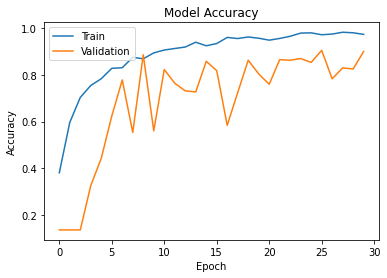

In [ ]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# (Greatlearning login)

**Observations:**

*   We can see from the above plot that **the training accuracy of the  model is excellent at 82% and the validation accuracy is excellent as well at 76%.**


In [ ]:
accuracy = hsv_model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

# (Greatlearning login)

15/15 - 0s - loss: 0.7380 - accuracy: 0.7768 - 342ms/epoch - 23ms/step


## **Generating the predictions using test data**

In [ ]:
# Here we would get the output as probablities for each category
y_pred=hsv_model.predict(X_test_normalized)

# (Greatlearning login)

15/15 [==============================] - 0s 21ms/step


In [ ]:
y_pred

array([[1.94501375e-08, 4.13467376e-07, 4.53795490e-09, ...,
        1.48683685e-05, 5.65729067e-07, 1.36135796e-07],
       [7.97109649e-08, 4.18587774e-03, 6.26385145e-06, ...,
        2.70101096e-04, 9.95350718e-01, 6.26520773e-08],
       [1.12686671e-07, 2.76389299e-04, 1.76741341e-05, ...,
        2.72162051e-05, 9.91308689e-01, 2.49609656e-07],
       ...,
       [6.26166761e-01, 4.33566711e-05, 6.32832234e-05, ...,
        7.93200343e-06, 2.23995576e-05, 1.04866187e-04],
       [2.90040829e-04, 1.54348044e-03, 6.09119656e-04, ...,
        1.30058855e-01, 8.17531909e-05, 1.29730515e-02],
       [9.00312443e-05, 6.10261738e-01, 6.08754084e-02, ...,
        8.37875828e-02, 1.90637529e-01, 1.53014518e-03]], dtype=float32)

### **Plotting the Confusion Matrix**

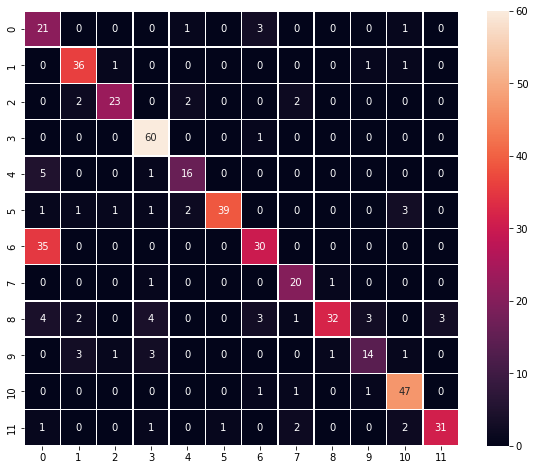

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg_hsv = np.argmax(y_pred,axis=1)
y_test_arg_hsv = np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg_hsv,y_pred_arg_hsv)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

# (Greatlearning login)

<b> Observations</b><br>
- Like our first cnn_model we observe that a lot of the classes predicting correctly.
- In comparison to the rest, we can see that classes 3, 5, 6, 8, 10, and 11 are well classified.
- We can also observe that classes 0 is misclassified with 6, likewise 6 is misclassified with 0.
* We can also observe that classes 2, 4, 7, and 9 need some improve with classifying correctly.

**Classification Report for each class**




In [ ]:
from sklearn.metrics import classification_report
print(classification_report((y_test_arg_hsv), y_pred_arg_hsv))

              precision    recall  f1-score   support

           0       0.31      0.81      0.45        26
           1       0.82      0.92      0.87        39
           2       0.88      0.79      0.84        29
           3       0.85      0.98      0.91        61
           4       0.76      0.73      0.74        22
           5       0.97      0.81      0.89        48
           6       0.79      0.46      0.58        65
           7       0.77      0.91      0.83        22
           8       0.94      0.62      0.74        52
           9       0.74      0.61      0.67        23
          10       0.85      0.94      0.90        50
          11       0.91      0.82      0.86        38

    accuracy                           0.78       475
   macro avg       0.80      0.78      0.77       475
weighted avg       0.83      0.78      0.78       475



## **Observations**

* Best precision score is class 5, worse precision score is class 0.
* Best recall score is class 3, worse precision score is class 6.
* Best f1-score is class 3, worse f1-score is class 0.


# **Visualizing the prediction:**

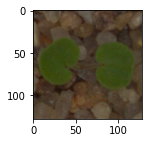

1/1 [==============================] - 0s 68ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


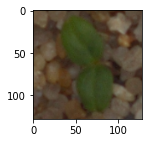

1/1 [==============================] - 0s 16ms/step
Predicted Label ['Cleavers']
True Label Cleavers


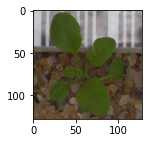

1/1 [==============================] - 0s 16ms/step
Predicted Label ['Shepherds Purse']
True Label Shepherds Purse


In [ ]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2, 2))
plt.imshow(X_test[2])
plt.show()
print('Predicted Label', enc.inverse_transform(cnn_model.predict((X_test_normalized[2].reshape(1, 128, 128, 3)))))
print('True Label', enc.inverse_transform(y_test_encoded)[2])

plt.figure(figsize=(2, 2))
plt.imshow(X_test[33])
plt.show()
print('Predicted Label', enc.inverse_transform(cnn_model.predict((X_test_normalized[33].reshape(1, 128, 128, 3)))))
print('True Label', enc.inverse_transform(y_test_encoded)[33])

plt.figure(figsize=(2, 2))
plt.imshow(X_test[36])
plt.show()
print('Predicted Label', enc.inverse_transform(cnn_model.predict((X_test_normalized[36].reshape(1, 128, 128, 3)))))
print('True Label', enc.inverse_transform(y_test_encoded)[36])

# (Greatlearning login)

In [ ]:
pd.DataFrame({'Models':['CNN Model', 'CNN Model with Data Augmentation', 'Transfer Learning Model', 'HSV Model'], 'Train Accuracy': ['97%', '90%', '69%', '82%'], 'Validation Accuracy': ['90%', '90%','72%', '76%'], 'Test Accuracy': ['87%', '86%', '73%', '78%']})

# (Greatlearning login)

,Models,Train Accuracy,Validation Accuracy,Test Accuracy
0,CNN Model,97%,90%,87%
1,CNN Model with Data Augmentation,90%,90%,86%
2,Transfer Learning Model,69%,72%,73%
3,HSV Model,82%,76%,78%


## **Conclusion**

* We can observe from the confusion matrix of all the models that our cnn_model and model-2 perform the best because they both predicted the majority of the classes better than the other models.
* The test accuracy of the cnn_model is 87%.
* The test accuracy of the model-2 is 86%.
* Data Augmentation did not help in improving the model.
* VGG16 caused the model to underfit which is not something we want for our model. Underfitting will cause the model to become worse in generalizing.
* Changing RBG to HSV reduce our model performance.
  * Simply employing the transfer learning model did not produce a better outcome than our ordinary CNN model and model-2.



# **References**

Greatlearning Login. https://olympus.mygreatlearning.com/login.

Plant Seedlings with CNN and Image Processing. https://kaggle.com/code/nikkonst/plant-seedlings-with-cnn-and-image-processing.